In [1]:
%matplotlib inline
%precision 3

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns
from scipy import stats

# matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'svg')
plt.style.use('ggplot')

# Problem 1

A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

## Sample of the Wholesale Customers Dataset

In [2]:
wholesale_df = pd.read_csv('datasets/Wholesale+Customers+Data.csv')
wholesale_df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


## Checking the types of variables in the dataset.

In [3]:
wholesale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


From the above output we can see that:
- There are 440 observations of different buyers in the data.
- There are 9 variables, out of which, 7 are of integer type and 2 are of object(categorical) type.
- Out of the 7 integer type variables, Buyer/Spender is discrete numerical variable while the others are continuous numerical variables.
- The dataset does not have any missing values.

## Checking the distributions of the continous variables.

From the below plot, it can be seen that the data for the continuous variables is not normally distributed.

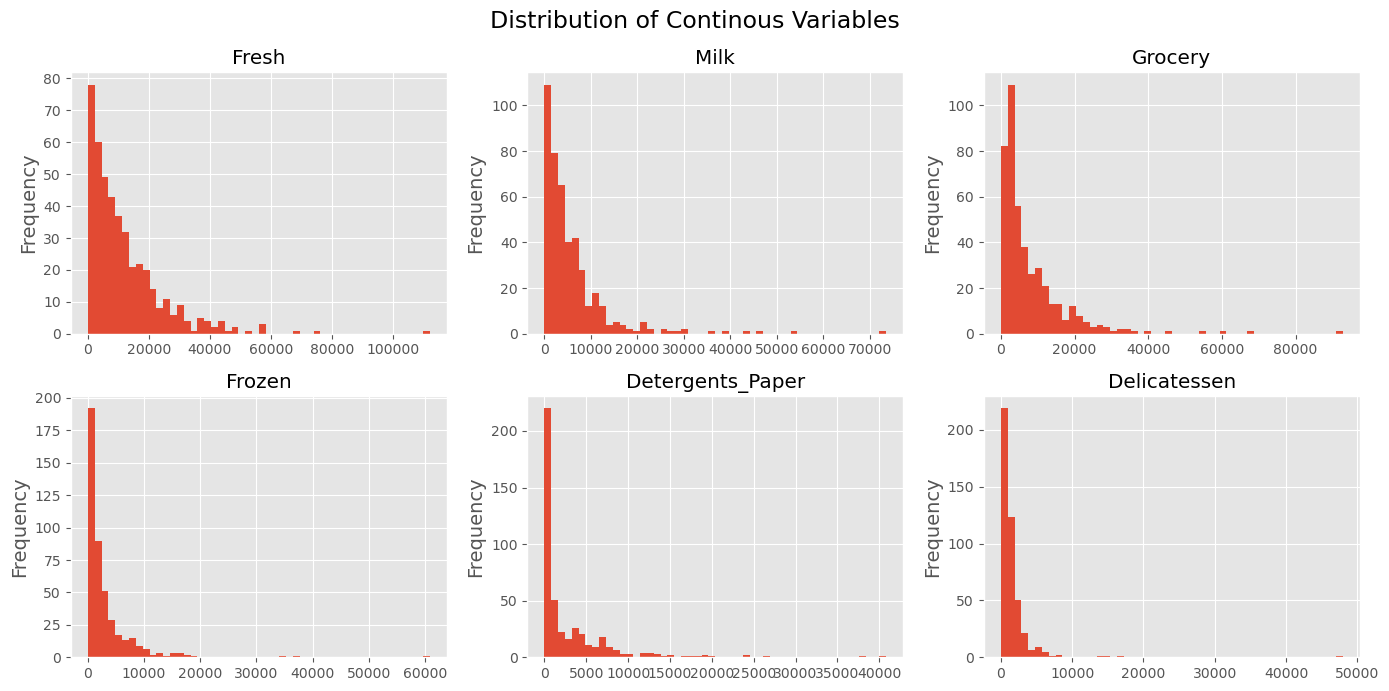

In [4]:
axs = wholesale_df.hist(column=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen'], 
                  figsize=(14, 7), bins=50, layout=(2, 3))
for ax in axs.flatten():
    ax.set_ylabel("Frequency", size=14)
plt.suptitle('Distribution of Continous Variables', size=17)
plt.tight_layout();
# plt.savefig('images/Figure1.svg')

## 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

### Descriptive Statistics of the Wholesale Customers Dataset

Descriptive Statistics tells us a brief summary of the dataset. It can include the 5-point summary for the
numerical variables and frequency distribution of categorical variables.

In [5]:
wholesale_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,NaN,NaN,NaN,220.5,127.161315,1.0,110.75,220.5,330.25,440.0
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440.0,NaN,NaN,NaN,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,NaN,NaN,NaN,5796.265909,7380.377175,55.0,1533.0,3627.0,7190.25,73498.0
Grocery,440.0,NaN,NaN,NaN,7951.277273,9503.162829,3.0,2153.0,4755.5,10655.75,92780.0
Frozen,440.0,NaN,NaN,NaN,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,NaN,NaN,NaN,2881.493182,4767.854448,3.0,256.75,816.5,3922.0,40827.0
Delicatessen,440.0,NaN,NaN,NaN,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


From the above output we can see that:
- The Channel variable has 2 unique values, with Hotel being the most frequent, occurring 298 times.
- The Region variable has 3 unique values, with Other being the most frequent, occurring 316 times.
- The Fresh items have the highest average annual spending in the dataset.
- The maximum annual spending values of all the items are quite high. These values might be outliers.
- The standard deviations of the annual spending are also large. This indicates that the data is spread over a big range.

NaN shows that the values cannot be calculated for that particular variable. Like we cannot calculate mean for
a categorical variable. And in a same way unique value cannot be calculated for a numerical variable.

### Region wise Total Annual Spendings for the items

In [6]:
wholesale_df['Total_Spendings'] = wholesale_df.eval('Fresh + Milk + Grocery + Frozen + Detergents_Paper + Delicatessen')
region_vs_total_spendings = wholesale_df.groupby('Region')[['Total_Spendings']].sum().sort_values(by='Total_Spendings')
region_vs_total_spendings

,Total_Spendings
Region,
Oporto,1555088
Lisbon,2386813
Other,10677599


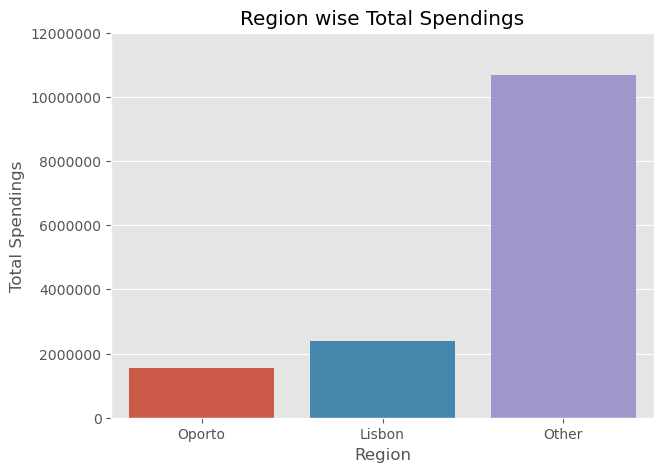

In [7]:
plt.figure(figsize=(7, 5))
sns.barplot(data=region_vs_total_spendings, y='Total_Spendings', x=region_vs_total_spendings.index)
plt.title('Region wise Total Spendings')
plt.ylabel('Total Spendings')
plt.yticks(labels=['0', '2000000', '4000000', '6000000', '8000000', '10000000', '12000000'], 
           ticks=np.linspace(0, 12000000, 7));
# plt.savefig('images/Figure2.png')

After calculating the Region wise Total Spending’s, we found that:
- The buyers spent the least in the Oporto region.
- The buyers spent the most in the Other regions.

### Channel wise Total Annual Spendings for the items

In [8]:
channel_vs_total_spendings = wholesale_df.groupby('Channel')[['Total_Spendings']].sum().sort_values(by='Total_Spendings')
channel_vs_total_spendings

,Total_Spendings
Channel,
Retail,6619931
Hotel,7999569


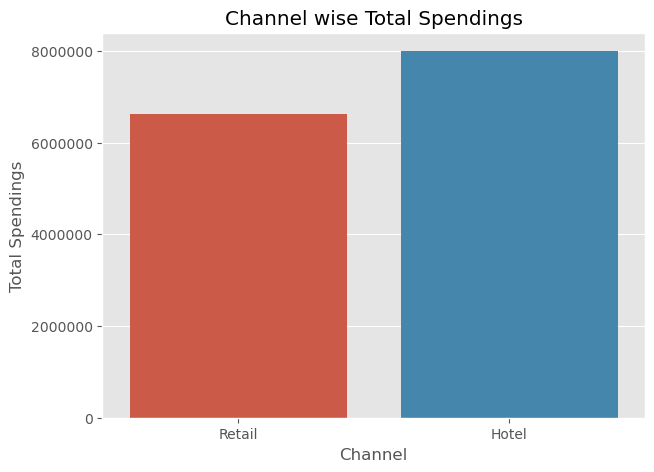

In [9]:
plt.figure(figsize=(7, 5))
sns.barplot(data=channel_vs_total_spendings, y='Total_Spendings', x=channel_vs_total_spendings.index)
plt.title('Channel wise Total Spendings')
plt.ylabel('Total Spendings')
plt.yticks(labels=['0', '2000000', '4000000', '6000000', '8000000'], 
           ticks=np.linspace(0, 8000000, 5));
# plt.savefig('images/Figure3.png')

After calculating the Channel wise Total Spending’s, we found that:
- The buyers spent the least in the Retail channels.
- The buyers spent the most in the Hotel channels.

## 1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

### Region wise Average spendings for different variety of Items.

In [10]:
items = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']
region_vs_items_mean = wholesale_df.groupby('Region')[items].mean()
region_vs_items_std = wholesale_df.groupby('Region')[items].std()
region_vs_items_mean

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Region,,,,,,
Lisbon,11101.727273,5486.415584,7403.077922,3000.337662,2651.116883,1354.896104
Oporto,9887.680851,5088.170213,9218.595745,4045.361702,3687.468085,1159.702128
Other,12533.471519,5977.085443,7896.363924,2944.594937,2817.753165,1620.601266


### Region wise Coefficient of Variation of spendings for different variety of Items.

Coefficient of Variations is a measure of relative dispersion around the mean. It is used to compare variables
with different ranges and units of measurements.

In [11]:
region_vs_items_cv = region_vs_items_std / region_vs_items_mean
region_vs_items_cv

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Region,,,,,,
Lisbon,1.041049,1.039815,1.147670,1.030599,1.587430,0.993008
Oporto,0.848318,1.145076,1.176182,2.262291,1.766718,0.906043
Other,1.068277,1.327648,1.207808,1.446761,1.630040,1.994680


From the above tables we can conclude that:
- For all the Regions in Portugal: -
    - Highest Averages spending’s are for Fresh items.
    - Lowest Averages spending’s are for Delicatessen items. This means that people spend less on expensive food stores.
    - In general, spending’s for all the items are largely spread out around the mean.
- In Lisbon: -
    - The spending’s for Detergents_Paper is highly spread out about its mean in comparison to other items. This could mean that the actual spending’s for Detergents_Paper are away from its mean and near the extreme values.
- In Oporto: -
    - The spending’s for Frozen items is highly spread out about its mean in comparison to other items. This could mean that the actual spending’s for Frozen are away from its mean and near the extreme values.
- In Other regions: -
    - The spending’s for Delicatessen is highly spread out about its mean in comparison to other items. This could mean that the actual spending’s for Delicatessen are away from its mean and near the extreme values.

### Channel wise Average spendings for different variety of Items.

In [12]:
channel_vs_items_mean = wholesale_df.groupby('Channel')[items].mean()
channel_vs_items_std = wholesale_df.groupby('Channel')[items].std()
channel_vs_items_mean

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,,,,,,
Hotel,13475.560403,3451.724832,3962.137584,3748.251678,790.560403,1415.956376
Retail,8904.323944,10716.500000,16322.852113,1652.612676,7269.507042,1753.436620


### Channel wise Coefficient of Variation of spendings for different variety of Items.

In [13]:
channel_vs_items_cv = channel_vs_items_std / channel_vs_items_mean
channel_vs_items_cv

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,,,,,,
Hotel,1.026428,1.260867,0.894849,1.505745,1.396596,2.222828
Retail,1.009365,0.903246,0.751543,1.096932,0.865408,1.114267


From the above tables we can conclude that:
- For all the Channels in Portugal: -
    - In general, spending’s for all the items are largely spread out around the mean.
- For Hotels in Portugal: -
    - Highest Averages spending’s are for Fresh items.
    - Lowest Averages spending’s are for Detergents_Paper.
    - The spending’s for Delicatessen is highly spread out about its mean in comparison to other
      items. This could mean that most of the values are less than the mean while only few are
      more than the mean.
- For Retail outlets in Portugal: -
    - Highest Averages spending’s are for Grocery items.
    - Lowest Averages spending’s are for Frozen items.
    - The spending’s for Delicatessen items is highly spread out about its mean in comparison to
      other items. This could mean that most of the values are less than the mean while only few
      are more than the mean.

## 1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

Using the Coefficient of Variation (CV) as a measure of variability, as the means of all the items are highly
different.

In [14]:
items_df = wholesale_df[items]
items_cv = items_df.std() / items_df.mean()
items_cv

Fresh               1.053918
Milk                1.273299
Grocery             1.195174
Frozen              1.580332
Detergents_Paper    1.654647
Delicatessen        1.849407
dtype: float64

From the above table we can see that:
- Delicatessen items show the most inconsistent behaviour as its CV is very high.
- Fresh items show the least inconsistent behaviour as its CV is very low.

## 1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

Box Plot is a very effective visualization to detect outliers. It also shows the five point summary of the
variables, which helps us to identify the distribution of the variables.

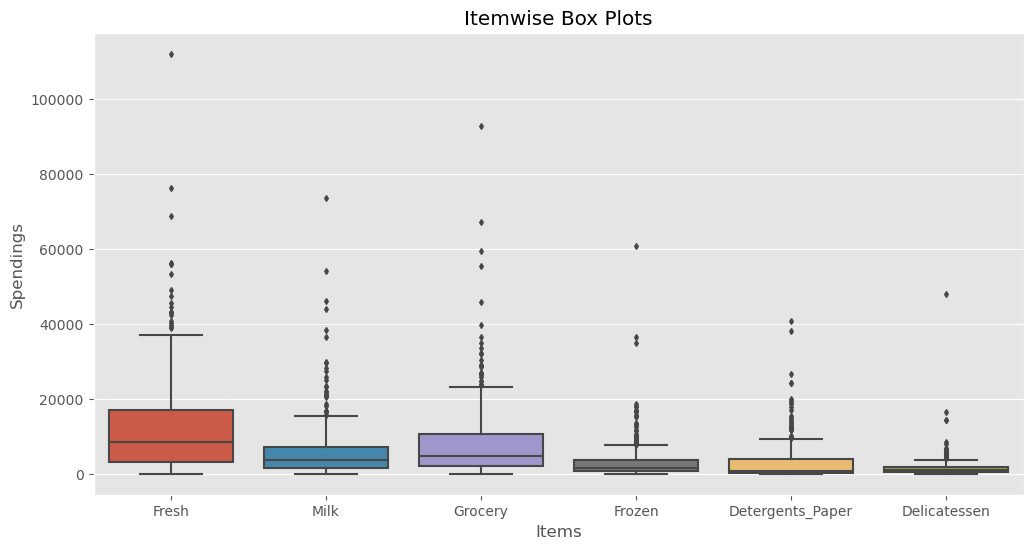

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=wholesale_df[items], fliersize=3)
plt.xlabel('Items')
plt.ylabel('Spendings')
plt.title('Itemwise Box Plots');
# plt.savefig('images/Figure4.png')

From the above box plot we can see that the spending’s for all the items in the dataset have outliers. The plot
also confirms that the spending’s are Positively skewed as the spread of data above the median is more than
spread of data below the median. These outliers can be buyers who buy in large quantities at once or buyers
who buy expensive items.

## 1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective

- From the above histograms we can see that, most of the buyers spend less for all items. So the wholesaler can keep more stock of reasonable items as compared to expensive items to meet demand expectations.
- __Fresh__ items are the most popular items bought by the customers. Keeping higher stock of the items might help increase sales and meet demands.
- __Delicatessen__ items are the least bought items. Reducing the stock of these items will help decrease inventory costs.
- __Oporto__ region has the lowest annual spendings. Increasing the stock of __Fresh__ and __Grocery__ items in this region might help increase sales.
- In __Lisbon__ region, __Detegent Paper__ and __Delicatessen__ items have the lowest sales. Reducing their stocks will help decrease inventory.
- The __Other__ regions combined have the highest sales. Increasing the customer base and keeping the prices reasonable can help increase sales and profit in this region.
- For __Hotel__ channels, providing offers on __Detegent Paper__ and __Delicatessen__ can help increase sales of these items. Also keeping high stocks of __Fresh__ items will help meet demand expectations.
- For __Retail__ channels, providing offers on __Frozen__ and __Delicatessen__ can help increase sales of these items. Also keeping high stocks of __Milk__ and __Grocery__ items will help meet demand expectations.

# Problem 2

The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the __Survey__ data set).

## Sample of the Survey Dataset

In [16]:
survey_df = pd.read_csv('datasets/Survey-1.csv')
survey_df.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


## Checking the types of variables in the dataset.

In [17]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


From the above output we can see that:
- There are 62 observations from different students in the data.
- There are 14 variables, out of which, 6 are of integer type, 2 are of float type and 6 are of object(categorical) type.
- The dataset does not have any missing values.

## 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

### 2.1.1. Gender and Major

In [18]:
gender_vs_major = pd.crosstab(index=survey_df['Gender'], columns=survey_df['Major'], margins=True, margins_name='Total')
gender_vs_major

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,Total
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
Total,7,4,11,6,10,7,14,3,62


### 2.1.2. Gender and Grad Intention

In [19]:
gender_vs_grad_intent = pd.crosstab(index=survey_df['Gender'], columns=survey_df['Grad Intention'], margins=True, margins_name='Total')
gender_vs_grad_intent

Grad Intention,No,Undecided,Yes,Total
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
Total,12,22,28,62


### 2.1.3. Gender and Employment

In [20]:
gender_vs_employment = pd.crosstab(index=survey_df['Gender'], columns=survey_df['Employment'], margins=True, margins_name='Total')
gender_vs_employment

Employment,Full-Time,Part-Time,Unemployed,Total
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
Total,10,43,9,62


### 2.1.4. Gender and Computer

In [21]:
gender_vs_computer = pd.crosstab(index=survey_df['Gender'], columns=survey_df['Computer'], margins=True, margins_name='Total')
gender_vs_computer

Computer,Desktop,Laptop,Tablet,Total
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
Total,5,55,2,62


## 2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

### 2.2.1. What is the probability that a randomly selected CMSU student will be male?

Out of the total 62 students, 29 students are male.

In [22]:
male_prob = 29 / 62
print(f"Hence the probability that a randomly selected CMSU student will be male is {round(male_prob, 3)}.")

Hence the probability that a randomly selected CMSU student will be male is 0.468.


### 2.2.2. What is the probability that a randomly selected CMSU student will be female?

Out of the total 62 students, 33 students are female.

In [23]:
female_prob = 33 / 62
print(f"Hence the probability that a randomly selected CMSU student will be female is {round(female_prob, 3)}.")

Hence the probability that a randomly selected CMSU student will be female is 0.532.


## 2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

### 2.3.1. Find the conditional probability of different majors among the male students in CMSU.

In [24]:
account_male_prob = gender_vs_major.loc['Male', 'Accounting'] / gender_vs_major.loc['Male', 'Total']
cis_male_prob = gender_vs_major.loc['Male', 'CIS'] / gender_vs_major.loc['Male', 'Total']
economics_male_prob = gender_vs_major.loc['Male', 'Economics/Finance'] / gender_vs_major.loc['Male', 'Total']
business_male_prob = gender_vs_major.loc['Male', 'International Business'] / gender_vs_major.loc['Male', 'Total']
manage_male_prob = gender_vs_major.loc['Male', 'Management'] / gender_vs_major.loc['Male', 'Total']
other_male_prob = gender_vs_major.loc['Male', 'Other'] / gender_vs_major.loc['Male', 'Total']
market_male_prob = gender_vs_major.loc['Male', 'Retailing/Marketing'] / gender_vs_major.loc['Male', 'Total']
undecided_male_prob = gender_vs_major.loc['Male', 'Undecided'] / gender_vs_major.loc['Male', 'Total']

In [25]:
print(f"Conditional probability that a Male student has an Accounting major is {round(account_male_prob, 3)}.")
print(f"Conditional probability that a Male student has a CIS major is {round(cis_male_prob, 3)}.")
print(f"Conditional probability that a Male student has an Economics/Finance major is {round(economics_male_prob, 3)}.")
print(f"Conditional probability that a Male student has an International Business major is {round(business_male_prob, 3)}.")
print(f"Conditional probability that a Male student has a Management major is {round(manage_male_prob, 3)}.")
print(f"Conditional probability that a Male student has Other major is {round(other_male_prob, 3)}.")
print(f"Conditional probability that a Male student has a Retailing/Marketing major is {round(market_male_prob, 3)}.")
print(f"Conditional probability that a Male student has an Undecided major is {round(undecided_male_prob, 3)}.")

Conditional probability that a Male student has an Accounting major is 0.138.
Conditional probability that a Male student has a CIS major is 0.034.
Conditional probability that a Male student has an Economics/Finance major is 0.138.
Conditional probability that a Male student has an International Business major is 0.069.
Conditional probability that a Male student has a Management major is 0.207.
Conditional probability that a Male student has Other major is 0.138.
Conditional probability that a Male student has a Retailing/Marketing major is 0.172.
Conditional probability that a Male student has an Undecided major is 0.103.


### 2.3.2. Find the conditional probability of different majors among the female students in CMSU.

In [26]:
account_female_prob = gender_vs_major.loc['Female', 'Accounting'] / gender_vs_major.loc['Female', 'Total']
cis_female_prob = gender_vs_major.loc['Female', 'CIS'] / gender_vs_major.loc['Female', 'Total']
economics_female_prob = gender_vs_major.loc['Female', 'Economics/Finance'] / gender_vs_major.loc['Female', 'Total']
business_female_prob = gender_vs_major.loc['Female', 'International Business'] / gender_vs_major.loc['Female', 'Total']
manage_female_prob = gender_vs_major.loc['Female', 'Management'] / gender_vs_major.loc['Female', 'Total']
other_female_prob = gender_vs_major.loc['Female', 'Other'] / gender_vs_major.loc['Female', 'Total']
market_female_prob = gender_vs_major.loc['Female', 'Retailing/Marketing'] / gender_vs_major.loc['Female', 'Total']
undecided_female_prob = gender_vs_major.loc['Female', 'Undecided'] / gender_vs_major.loc['Female', 'Total']

In [27]:
print(f"Conditional probability that a Female student has an Accounting major is {round(account_female_prob, 3)}.")
print(f"Conditional probability that a Female student has a CIS major is {round(cis_female_prob, 3)}.")
print(f"Conditional probability that a Female student has an Economics/Finance major is {round(economics_female_prob, 3)}.")
print(f"Conditional probability that a Female student has an International Business major is {round(business_female_prob, 3)}.")
print(f"Conditional probability that a Female student has a Management major is {round(manage_female_prob, 3)}.")
print(f"Conditional probability that a Female student has Other major is {round(other_female_prob, 3)}.")
print(f"Conditional probability that a Female student has a Retailing/Marketing major is {round(market_female_prob, 3)}.")
print(f"Conditional probability that a Female student has an Undecided major is {round(undecided_female_prob, 3)}.")

Conditional probability that a Female student has an Accounting major is 0.091.
Conditional probability that a Female student has a CIS major is 0.091.
Conditional probability that a Female student has an Economics/Finance major is 0.212.
Conditional probability that a Female student has an International Business major is 0.121.
Conditional probability that a Female student has a Management major is 0.121.
Conditional probability that a Female student has Other major is 0.091.
Conditional probability that a Female student has a Retailing/Marketing major is 0.273.
Conditional probability that a Female student has an Undecided major is 0.0.


## 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

### 2.4.1. Find the probability that a randomly chosen student is a male and intends to graduate.

Out of the 62 students, 17 students are male who intends to graduate. 

In [28]:
grad_yes_male = gender_vs_grad_intent.loc['Male', 'Yes'] / 62
print(f"Hence the probability that a randomly chosen student is a male and intends to graduate is {round(grad_yes_male, 3)}.")

Hence the probability that a randomly chosen student is a male and intends to graduate is 0.274.


### 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop. 

Out of the 62 students, 4 students are female who do not have a laptop.

In [29]:
no_laptop_female = gender_vs_computer.loc['Female', ['Desktop', 'Tablet']].sum() / 62
print(f"Hence the probability that a randomly chosen student is a female and does NOT have a laptop is {round(no_laptop_female, 3)}.")

Hence the probability that a randomly chosen student is a female and does NOT have a laptop is 0.065.


## 2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

### 2.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?

In [30]:
full_time_male = (gender_vs_employment.loc['Male', 'Total'] + 
                  gender_vs_employment.loc['Total', 'Full-Time'] - 
                  gender_vs_employment.loc['Male', 'Full-Time']) / 62
print(f"Out of the 62 students, 29 are male, 10 have full time jobs, and 7 are both male and have full time jobs.\n"
      f"Hence the probability that a randomly chosen student is a male or has full-time employment is {round(full_time_male, 3)}.")

Out of the 62 students, 29 are male, 10 have full time jobs, and 7 are both male and have full time jobs.
Hence the probability that a randomly chosen student is a male or has full-time employment is 0.516.


### 2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

Out of the 33 female students, 4 are majoring in International Business and 4 are majoring in Management.

In [31]:
business_manage_female = gender_vs_major.loc['Female', ['International Business', 'Management']].sum() / gender_vs_major.loc['Female', 'Total']
print(f"Hence the conditional probability that given a female student is randomly chosen, she is majoring in "
      f"international business or management is {round(business_manage_female, 3)}.")

Hence the conditional probability that given a female student is randomly chosen, she is majoring in international business or management is 0.242.


## 2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [32]:
gender_vs_intent_2_levels = survey_df.loc[survey_df['Grad Intention'] != 'Undecided', ['Gender', 'Grad Intention']]
gender_vs_intent_2_levels = pd.crosstab(index=gender_vs_intent_2_levels['Gender'], 
                                        columns=gender_vs_intent_2_levels['Grad Intention'], 
                                        margins=True, margins_name='Total')
gender_vs_intent_2_levels

Grad Intention,No,Yes,Total
Gender,,,
Female,9,11,20
Male,3,17,20
Total,12,28,40


In [33]:
female_prob = gender_vs_intent_2_levels.loc['Female', 'Total'] / gender_vs_intent_2_levels.loc['Total', 'Total']
yes_intent_prob = gender_vs_intent_2_levels.loc['Total', 'Yes'] / gender_vs_intent_2_levels.loc['Total', 'Total']
yes_intent_and_female = gender_vs_intent_2_levels.loc['Female', 'Yes'] / gender_vs_intent_2_levels.loc['Total', 'Total']

if yes_intent_and_female == (female_prob * yes_intent_prob):
    print("Hence using the above mentioned formula we find that the graduate intention and being female are independent events.")
else:
    print("Hence using the above mentioned formula we find that the graduate intention and being female are not independent events.")

Hence using the above mentioned formula we find that the graduate intention and being female are not independent events.


## 2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.<br/>Answer the following questions based on the data

### 2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [34]:
gpa_less_than_3_prob = survey_df[survey_df['GPA'] < 3].shape[0] / survey_df.shape[0]
print(f"Out of the 62 students, 17 students have GPA less than 3.\n"
      f"Hence if a student is chosen randomly, the probability that his/her GPA is less than 3 is {round(gpa_less_than_3_prob, 3)}.")

Out of the 62 students, 17 students have GPA less than 3.
Hence if a student is chosen randomly, the probability that his/her GPA is less than 3 is 0.274.


### 2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

In [35]:
male_salary_more_50 = survey_df[(survey_df['Gender'] == 'Male') & (survey_df['Salary'] >= 50)].shape[0] / survey_df[survey_df['Gender'] == 'Male'].shape[0]
print(f"Out of the 29 male students, 14 students have salaries more than or equal to 50.\n"
      f"Hence the conditional probability that a randomly selected male earns 50 or more is {round(male_salary_more_50, 3)}.")

Out of the 29 male students, 14 students have salaries more than or equal to 50.
Hence the conditional probability that a randomly selected male earns 50 or more is 0.483.


In [36]:
female_salary_more_50 = survey_df[(survey_df['Gender'] == 'Female') & (survey_df['Salary'] >= 50)].shape[0] / survey_df[survey_df['Gender'] == 'Female'].shape[0]
print(f"Out of the 33 female students, 18 students have salaries more than or equal to 50.\n"
      f"Hence the conditional probability that a randomly selected female earns 50 or more is {round(female_salary_more_50, 3)}.")

Out of the 33 female students, 18 students have salaries more than or equal to 50.
Hence the conditional probability that a randomly selected female earns 50 or more is 0.545.


## 2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

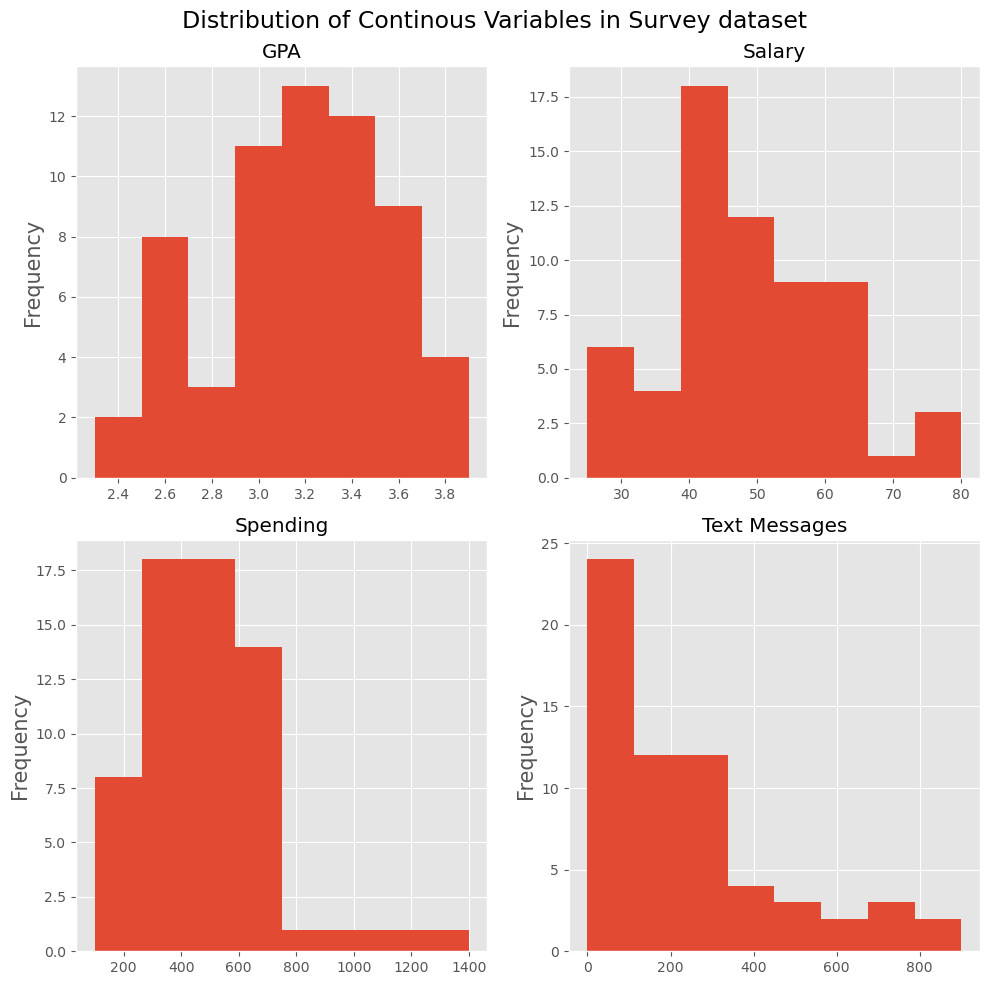

In [37]:
axs = survey_df.hist(column=['GPA', 'Salary', 'Spending', 'Text Messages'], 
                  figsize=(10, 10), bins=8, layout=(2, 2))
for ax in axs.flatten():
    ax.set_ylabel("Frequency", size=15)
plt.suptitle('Distribution of Continous Variables in Survey dataset', size=17)
plt.tight_layout();
# plt.savefig('images/Figure5.svg')

Theoretically the mean, median and mode of a normal distribution are equal.

### Distribution of GPA

In [38]:
gpa_mean = survey_df['GPA'].mean()
gpa_median = survey_df['GPA'].median()
gpa_mode = survey_df['GPA'].mode()
gpa_std = survey_df['GPA'].std()
print(f"For the GPA variable:\n"
      f"Mean = {round(gpa_mean, 1)}\n"
      f"Median = {round(gpa_median, 1)}\n"
      f"Mode = [{gpa_mode[0]}, {gpa_mode[1]}, {gpa_mode[2]}]")

For the GPA variable:
Mean = 3.1
Median = 3.2
Mode = [3.0, 3.1, 3.4]


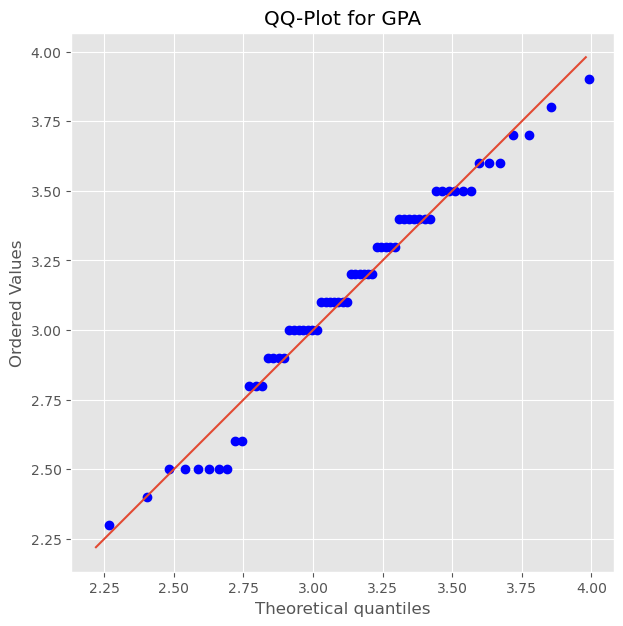

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
plt.axis('equal')
stats.probplot(survey_df['GPA'], plot=sns.mpl.pyplot, sparams=(gpa_mean, gpa_std), fit=False)
plt.plot(plt.ylim(), plt.ylim())
plt.title('QQ-Plot for GPA');
# plt.savefig('images/Figure6.png')

From the above outputs we can conclude that the GPA variable in the Survey dataset approximately follows a
normal distribution. This can also be verified from the histogram in Figure 5.

### Distribution of Salary

In [40]:
salary_mean = survey_df['Salary'].mean()
salary_median = survey_df['Salary'].median()
salary_mode = survey_df['Salary'].mode()
salary_std = survey_df['Salary'].std()
print(f"For the Salary variable:\n"
      f"Mean = {round(salary_mean, 1)}\n"
      f"Median = {round(salary_median, 1)}\n"
      f"Mode = {salary_mode[0]}")

For the Salary variable:
Mean = 48.5
Median = 50.0
Mode = 40.0


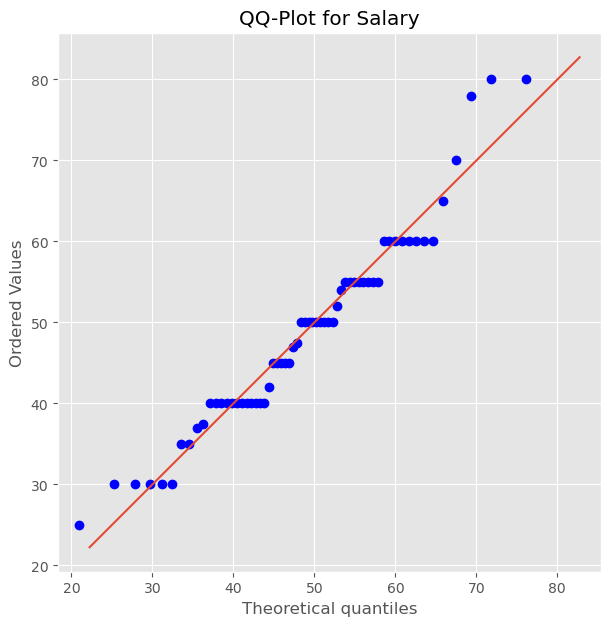

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
plt.axis('equal')
stats.probplot(survey_df['Salary'], plot=sns.mpl.pyplot, sparams=(salary_mean, salary_std), fit=False)
plt.plot(plt.ylim(), plt.ylim())
plt.title('QQ-Plot for Salary');
# plt.savefig('images/Figure7.png')

The mean, median and mode of Salary are very different from each other but its QQ-Plot is close to the
straight line. Hence the Salary variable approximately follows a normal distribution. This can also be verified
from the histogram in Figure 5.

### Distribution of Spending

In [42]:
spend_mean = survey_df['Spending'].mean()
spend_median = survey_df['Spending'].median()
spend_mode = survey_df['Spending'].mode()
spend_std = survey_df['Spending'].std()
print(f"For the Spending variable:\n"
      f"Mean = {round(spend_mean, 1)}\n"
      f"Median = {round(spend_median, 1)}\n"
      f"Mode = {spend_mode[0]}")

For the Spending variable:
Mean = 482.0
Median = 500.0
Mode = 500


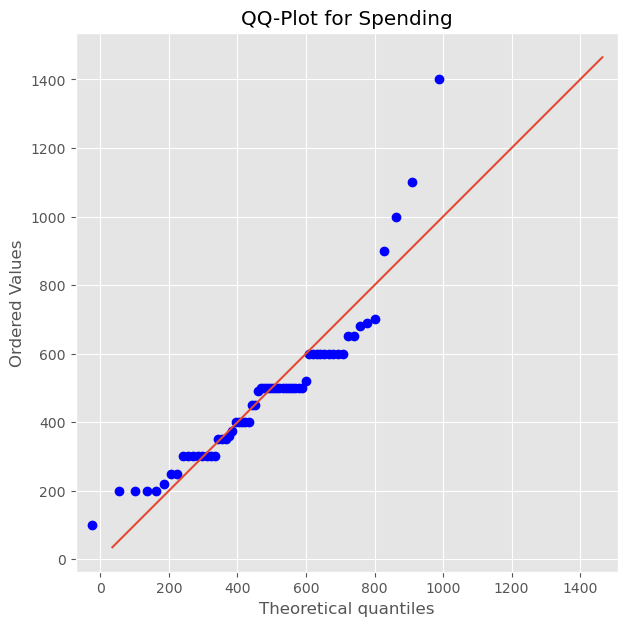

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
plt.axis('equal')
stats.probplot(survey_df['Spending'], plot=sns.mpl.pyplot, sparams=(spend_mean, spend_std), fit=False)
plt.plot(plt.ylim(), plt.ylim())
plt.title('QQ-Plot for Spending');
# plt.savefig('images/Figure8.png')

Even though the mean, median and mode of Spending are close to each other, its QQ-Plot varies a lot from the
straight line. Hence the Spending variable does not follow a normal distribution. This can also be verified from
the histogram in Figure 5.

### Distribution of Text Messages

In [44]:
sms_mean = survey_df['Text Messages'].mean()
sms_median = survey_df['Text Messages'].median()
sms_mode = survey_df['Text Messages'].mode()
sms_std = survey_df['Text Messages'].std()
print(f"For the Text Messages variable:\n"
      f"Mean = {round(sms_mean, 1)}\n"
      f"Median = {round(sms_median, 1)}\n"
      f"Mode = {sms_mode[0]}")

For the Text Messages variable:
Mean = 246.2
Median = 200.0
Mode = 300


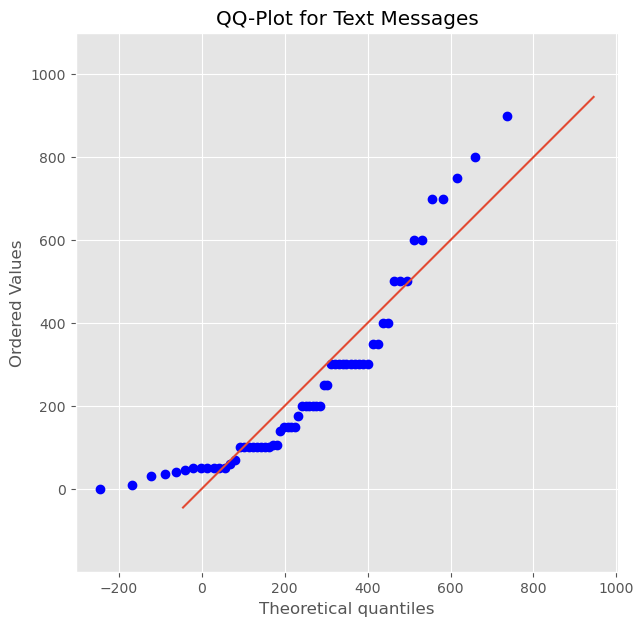

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
plt.axis('equal')
stats.probplot(survey_df['Text Messages'], plot=sns.mpl.pyplot, sparams=(sms_mean, sms_std), fit=False)
plt.plot(plt.ylim(), plt.ylim())
plt.title('QQ-Plot for Text Messages');
# plt.savefig('images/Figure9.png')

As the mean, median and mode of Text Messages variable are very different from each other and its QQ-Plot is
not close to the straight line, the Text Messages variable does not follow a normal distribution. This can also be
verified from the histogram in Figure 5.

# Problem 3

An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and coloring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet are calculated. The company would like to show that the mean moisture content is less than 0.35 pounds per 100 square feet.

The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.

## Sample of the A & B Shingles Dataset

In [46]:
shingles_df = pd.read_csv('datasets/A+&+B+shingles.csv')
shingles_df.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


## Checking the types of variables in the dataset.

In [47]:
shingles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       36 non-null     float64
 1   B       31 non-null     float64
dtypes: float64(2)
memory usage: 704.0 bytes


## Checking the distribution of both variables in the Shingles dataset.

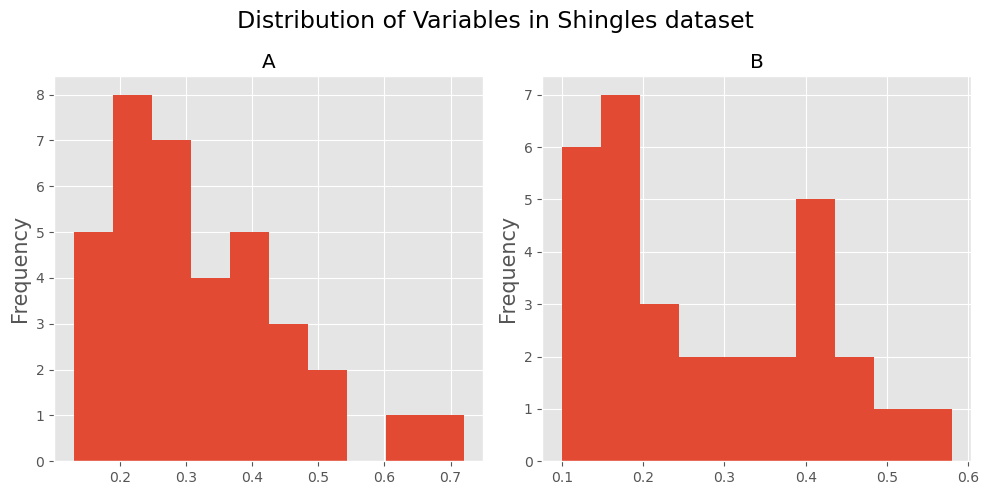

In [48]:
axs = shingles_df.hist(figsize=(10, 5))
for ax in axs.flatten():
    ax.set_ylabel("Frequency", size=15)
plt.suptitle('Distribution of Variables in Shingles dataset', size=17)
plt.tight_layout();
# plt.savefig('images/Figure10.svg')

## 3.1 Do you think there is evidence that mean moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

### Hypothesis test for A shingles

In [49]:
# using "alternative = 'greater'" for right-tailed t-test.
t_stat, p_value = stats.ttest_1samp(shingles_df['A'], popmean=0.35, alternative='greater')
print(f"t_statistic = {t_stat} and p_value = {p_value}")

t_statistic = -1.4735046253382782 and p_value = 0.9252236685509249


### Hypothesis test for B shingles

In [50]:
# using "alternative = 'greater'" for right-tailed t-test.
t_stat, p_value = stats.ttest_1samp(shingles_df['B'].dropna(), popmean=0.35, alternative='greater')
print(f"t_statistic = {t_stat} and p_value = {p_value}")

t_statistic = -3.1003313069986995 and p_value = 0.9979095225996808


## 3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

To perform a 2-sample t-test, we assume that the sample variance of both the samples are equal.

In [51]:
A_var = shingles_df['A'].var(skipna=True)
B_var = shingles_df['B'].var(skipna=True)
print(f'The ratio of the variance of both samples is {A_var / B_var}.\n'
      f'As the ratio is close to 1 we can proceed we the 2-sample t-test.')

The ratio of the variance of both samples is 0.9773231765154546.
As the ratio is close to 1 we can proceed we the 2-sample t-test.


### Hypothesis Test

In [52]:
t_stat, p_value = stats.ttest_ind(shingles_df['A'], shingles_df['B'], nan_policy='omit')
print(f"t_statistic = {t_stat} and p_value = {p_value}")

t_statistic = 1.2896282719661123 and p_value = 0.20174965718353277
